In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder

from numpy import concatenate

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense

In [10]:
data = pd.read_csv('data/shipping_data.csv')

In [11]:
clean_data = data.dropna()

data =  clean_data
data = data.loc[data['destination port'] == 'Port of Tokyo (Japan)']

le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])
data['shipment date'] = pd.to_datetime(data['shipment date'], dayfirst=True).view('int64') / 10**9


X = data[['name', 'weight (kg)','length (m)','width (m)','height (m)']]
Y = data[['price ($)']]

# X_trian, Y_train, X_val, Y_val, X_test, Y_test

/tmp/ipykernel_92629/4287484373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = le.fit_transform(data['name'])
/tmp/ipykernel_92629/4287484373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shipment date'] = pd.to_datetime(data['shipment date'], dayfirst=True).view('int64') / 10**9


#Model Details
CNN has been implemented because it can be useful for analyzing the physical attributes such as height, weight, and length of the commodities. CNN models excel at extracting spatial patterns and hierarchical features from grid-like structured data. That is in this case, CNN can be applied to analyze the physical characteristics of the commodities and understand how they relate to other factors such as price.

The first goal is to reshape the input data (X_train and X_test) to match the expected input shape of the CNN model. The input shape is defined as (samples, features, 1), where:

*   samples: the number of samples or data points.
*   features: the number of input features (in your case, the number of attributes: height, weight, and length).

*   1: indicates the number of channels. Since the data we have is 
one-dimensional data, the value is set to 1.

The np.reshape(): is used to reshape the input data arrays. The X_train.shape[0]: returns the number of samples in the training set, and features represents the number of features. By reshaping the input arrays, we add an additional dimension of size 1 to represent the single channel.

The CNN model using the Keras Sequential API.


*   Conv1D is a one-dimensional convolutional layer. It applies a set of filters to the input data, capturing local patterns and features. The filters parameter specifies the number of filters to be used, and kernel_size determines the size of the convolution window.
*   MaxPooling1D is a downsampling layer that reduces the spatial dimensions of the output from the previous convolutional layer. It takes the maximum value within each pooling window, reducing the number of parameters and capturing the most important features.
*   Flatten is used to flatten the output from the previous layers into a one-dimensional vector, preparing it to be connected to the dense layers.
*   Dense is a fully connected layer that performs computations on the flattened input. In this case, units=1 represents a single output unit (for the price prediction in your case).

These different steps constitute the architecture of CNN Model.

In [12]:
# LSTM + CNN

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape the input
# input shape: (samples, features, 1)
features = X_train.shape[1]
X_train = np.reshape(X_train, (X_train.shape[0], features, 1))
X_test = np.reshape(X_test, (X_test.shape[0], features, 1))

# Build the model
model_lc = Sequential()
model_lc.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(features, 1)))
model_lc.add(MaxPooling1D(pool_size=2))
model_lc.add(Flatten())
model_lc.add(Dense(units=1))

# Compile the model
model_lc.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lc.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1307/1307 [==============================] - 2s 944us/step - loss: 0.8110
Epoch 2/10
1307/1307 [==============================] - 1s 1ms/step - loss: 0.7347
Epoch 3/10
1307/1307 [==============================] - 2s 1ms/step - loss: 0.6797
Epoch 4/10
1307/1307 [==============================] - 1s 1ms/step - loss: 0.6304
Epoch 5/10
1307/1307 [==============================] - 1s 1ms/step - loss: 0.5890
Epoch 6/10
1307/1307 [==============================] - 1s 1ms/step - loss: 0.5631
Epoch 7/10
1307/1307 [==============================] - 1s 1ms/step - loss: 0.5361
Epoch 8/10
1307/1307 [==============================] - 1s 1ms/step - loss: 0.5181
Epoch 9/10
1307/1307 [==============================] - 1s 1ms/step - loss: 0.5049
Epoch 10/10
1307/1307 [==============================] - 1s 999us/step - loss: 0.4851


In [13]:
print(model_lc.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 64)             256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None





# Actual vs Predicted Values
The scatter plot displays the points representing the actual vs predicted values, where the x-axis represents the actual values and the y-axis represents the predicted values. The red dashed line indicates the ideal scenario where the actual and predicted values are identical.

327/327 [==============================] - 0s 581us/step


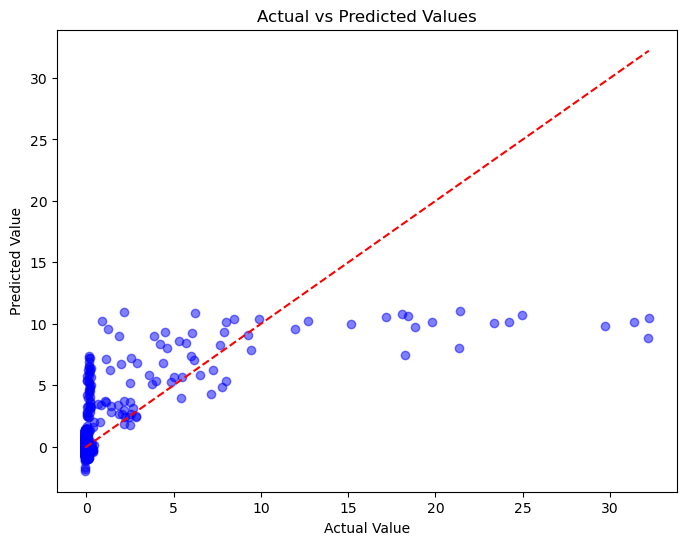

In [14]:
# Predict on the test set
y_pred = model_lc.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.show()